In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [5]:
image_path = '../output_images/player_2.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

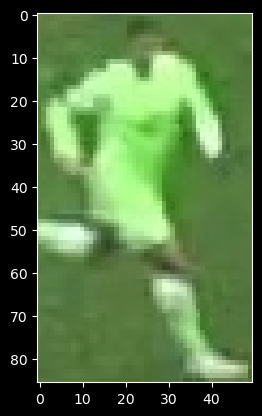

In [6]:
plt.imshow(image)

#### We need only top half of the image

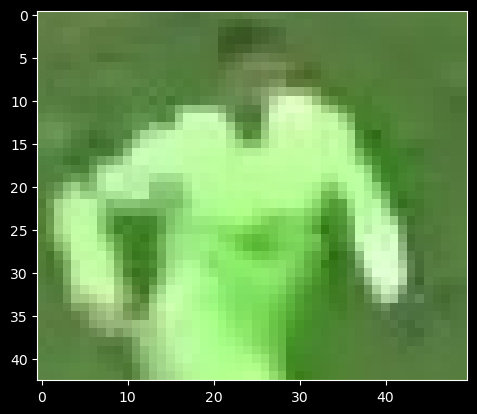

In [7]:
top_half_image = image[0: int(image.shape[0]/2)]
plt.imshow(top_half_image)

#### Cluster the image into two clusters

c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


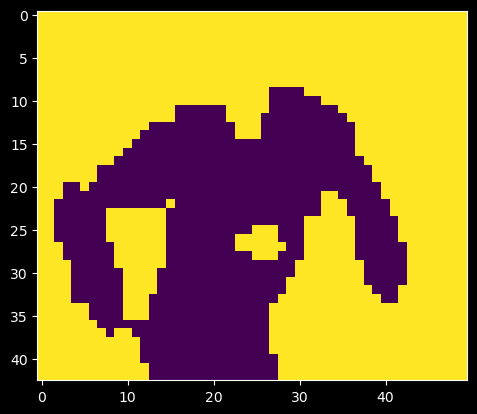

In [8]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform kmeans clustering
Kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d) 

# get the cluster labels
labels = Kmeans.labels_

# reshape the labels to the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)

In [9]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print('Non player cluster:', non_player_cluster)

Non player cluster: 1


In [10]:
player_cluster = 1-non_player_cluster
print('Player cluster:', player_cluster)

Player cluster: 0


In [11]:
Kmeans.cluster_centers_[player_cluster]

array([171.1701847 , 235.37862797, 142.83641161])